# Tensorflow - Keras

## About

Keras is a high-level neural networks API, written in Python and capable of running on top of **TensorFlow**, **CNTK**, or **Theano**. It was developed with a focus on enabling fast experimentation.

## Layers

### Input Layer

```python
keras.engine.input_layer.Input(shape=None,
                               batch_shape=None,
                               name=None,
                               dtype=None,
                               sparse=False,
                               tensor=None)
```

### Dense Layer

```python
keras.layers.Dense(units,
                   activation=None,
                   use_bias=True,
                   kernel_initializer='glorot_uniform',
                   bias_initializer='zeros',
                   kernel_regularizer=None,
                   bias_regularizer=None,
                   activity_regularizer=None,
                   kernel_constraint=None,
                   bias_constraint=None)
```

### Convolutional Layers

```python
keras.layers.Conv2D(filters,
                    kernel_size,
                    strides=(1, 1),
                    padding='valid',
                    data_format=None,
                    dilation_rate=(1, 1),
                    activation=None,
                    use_bias=True,
                    kernel_initializer='glorot_uniform',
                    bias_initializer='zeros',
                    kernel_regularizer=None,
                    bias_regularizer=None,
                    activity_regularizer=None,
                    kernel_constraint=None,
                    bias_constraint=None)
```

### Flatten Layer

```python
keras.layers.Flatten(data_format=None)
```

### Pooling Layer

```python
keras.layers.MaxPooling2D(pool_size=(2, 2),
                          strides=None,
                          padding='valid',
                          data_format=None)
```

![](../images/Maxpooling.png)

### Recurrent Layers

```python
keras.layers.RNN(cell,
                 return_sequences=False,
                 return_state=False,
                 go_backwards=False,
                 stateful=False,
                 unroll=False)
```

![](../images/rnn_layer.png)

### Add Layer

```python
keras.layers.Add()
```

### Subtract Layer

```python
keras.layers.Subtract()
```

### Activation Layers

#### ReLU

```python
keras.layers.ReLU(max_value=None,
                  negative_slope=0.0,
                  threshold=0.0)
```

![](../images/relu.png)

#### Softmax

```python
keras.layers.Softmax(axis=-1)
```

### Normalization Layer

```python
keras.layers.BatchNormalization(axis=-1,
                                momentum=0.99,
                                epsilon=0.001,
                                center=True,
                                scale=True,
                                beta_initializer='zeros',
                                gamma_initializer='ones',
                                moving_mean_initializer='zeros',
                                moving_variance_initializer='ones',
                                beta_regularizer=None,
                                gamma_regularizer=None,
                                beta_constraint=None,
                                gamma_constraint=None)
```

## Optimizers

![](../images/optimizers.gif)

### Adam

```python
keras.optimizers.Adam(lr=0.001,
                      beta_1=0.9,
                      beta_2=0.999,
                      epsilon=None,
                      decay=0.0,
                      amsgrad=False)
```

### RMSprop

```python
keras.optimizers.RMSprop(lr=0.001,
                         rho=0.9,
                         epsilon=None,
                         decay=0.0)
```

### SGD

```python
keras.optimizers.SGD(lr=0.01,
                     momentum=0.0,
                     decay=0.0,
                     nesterov=False)
```

## Model Methods

### compile

```python
tf.keras.Model.compile(optimizer,
                       loss=None,
                       metrics=None,
                       loss_weights=None,
                       sample_weight_mode=None,
                       weighted_metrics=None,
                       target_tensors=None)
```

### summary

```python
tf.keras.Model.summary(line_length=None,
                       positions=None,
                       print_fn=None)
```

### fit

```python
tf.keras.Model.fit(x=None,
                   y=None,
                   batch_size=None,
                   epochs=1,
                   verbose=1,
                   callbacks=None,
                   validation_split=0.0,
                   validation_data=None,
                   shuffle=True,
                   class_weight=None,
                   sample_weight=None,
                   initial_epoch=0,
                   steps_per_epoch=None,
                   validation_steps=None,
                   validation_freq=1)
```

### evaluate

```python
tf.keras.Model.evaluate(x=None,
                        y=None,
                        batch_size=None,
                        verbose=1,
                        sample_weight=None,
                        steps=None,
                        callbacks=None)
```

### predict

```python
tf.keras.Model.predict(x,
                       batch_size=None,
                       verbose=0,
                       steps=None,
                       callbacks=None)
```

## Example: XOR Problem (Keras version)

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
import time

In [23]:
# Set training data.
training_data = np.array([[0,0], [0,1], [1,0], [1,1]], np.float32)
target_data = np.array([[0], [1], [1], [0]], np.float32)

# Define hidden and output layer.
model_xor = Sequential()
model_xor.add(Dense(4, input_dim=2, activation='relu'))  # weight and bias are inherent.
model_xor.add(Dense(1, activation='sigmoid'))

# Select loss function and optimizer.
model_xor.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])
model_xor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [21]:
start_time = time.time()

# Start training.
model_xor.fit(training_data, target_data, epochs=10000, verbose=0)

print('Elapsed time =', time.time() - start_time)

Elapsed time = 36.96934199333191


In [24]:
result = model_xor.predict(training_data)
for index in range(len(training_data)):
    print(training_data[index], '=>', result[index][0])

[0. 0.] => 0.000301079
[0. 1.] => 0.9997074
[1. 0.] => 0.99972683
[1. 1.] => 0.0002741845


&#x261b; Compare with Tensorflow version in [40_tensorflow/42_Basics.ipynb](../40_tensorflow/42_Basics.ipynb#Example--XOR-Problem)

## Example: MNIST OCR Problem (MLP version)

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


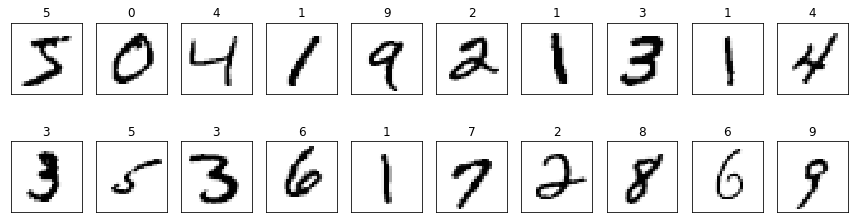

In [7]:
plt.figure(figsize=(15, 4))
for digit in range(20):
    plt.subplot(2, 10, digit + 1)
    plt.xticks([]); plt.yticks([])
    plt.title(y_train[digit])
    plt.imshow(x_train[digit], cmap='Greys')

In [8]:
# Reshaping the array to 4-dims so that it can work with the Keras API
# [samples, channels, width, height]
x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('Number of images in x_train =', x_train.shape[0])
print('Number of images in x_test =', x_test.shape[0])

x_train shape: (60000, 1, 28, 28)
Number of images in x_train = 60000
Number of images in x_test = 10000


In [10]:
# Create networks.
model_mlp = Sequential()
model_mlp.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model_mlp.add(Dense(128, activation=tf.nn.relu))
model_mlp.add(Dense(64, activation=tf.nn.relu))
model_mlp.add(Dense(10, activation=tf.nn.softmax))
model_mlp.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

In [10]:
# Train networks.
model_mlp.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.2448 - acc: 0.9290
Epoch 2/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.1048 - acc: 0.9682
Epoch 3/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.0743 - acc: 0.9768
Epoch 4/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.0564 - acc: 0.9828
Epoch 5/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.0437 - acc: 0.9860
Epoch 6/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.0358 - acc: 0.9882
Epoch 7/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.0293 - acc: 0.9905
Epoch 8/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.0245 - acc: 0.9918
Epoch 9/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.0214 - acc: 0.9931
Epoch 10/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.0192 - a

In [11]:
# Test networks
loss, metrics = model_mlp.evaluate(x_test, y_test)
print('loss =', loss)
print('metrics =', metrics)

10000/10000 [==============================] - 1s 64us/step
loss = 0.0874801150770989
metrics = 0.9781


In [20]:
model_mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  100480    
_________________________________________________________________
dense_3 (Dense)              multiple                  8256      
_________________________________________________________________
dense_4 (Dense)              multiple                  650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


## Example: MNIST OCR Problem (CNN version)

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import backend

backend.set_image_data_format('channels_first')

In [4]:
# Create networks.
model_cnn = Sequential()
model_cnn.add(Conv2D(filters=32, kernel_size=(5, 5), input_shape=(1, 28, 28), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Conv2D(15, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.2))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))
model_cnn.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

In [15]:
# Train networks.
model_cnn.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 13s 216us/step - loss: 0.1943 - acc: 0.9390
Epoch 2/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.0686 - acc: 0.9789
Epoch 3/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.0521 - acc: 0.9842
Epoch 4/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.0432 - acc: 0.9862
Epoch 5/10
60000/60000 [==============================] - 12s 201us/step - loss: 0.0382 - acc: 0.9879
Epoch 6/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.0334 - acc: 0.9895
Epoch 7/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.0288 - acc: 0.9908
Epoch 8/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.0258 - acc: 0.9913
Epoch 9/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.0226 - acc: 0.9926
Epoch 10/10
60000/60000 [==============================] - 12s 201us/step - loss: 

In [16]:
# Test networks
loss, metrics = model_cnn.evaluate(x_test, y_test)
print('loss =', loss)
print('metrics =', metrics)

10000/10000 [==============================] - 1s 82us/step
loss = 0.029972269386977134
metrics = 0.9911


In [19]:
model_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 24, 24)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 12, 12)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 10, 10)        4335      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 5, 5)          0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 5, 5)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               48128     
__________

## MLP vs. CNN

|                | MLP |    | CNN |
|----------------|-----|----|-----|
| Layers         |     | << |     |
| Parameters     |     | >> |     |
| Learning speed |     | << |     |
| Accurary       |     | << |     |
| Generalization |     | << |     |

## Save and Restore Model

In [31]:
# Save model.
model_xor.save('../temp/model_xor.h5')

In [34]:
import tensorflow.keras.models

# Restore model.
new_model = tensorflow.keras.models.load_model('../temp/model_xor.h5')
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


## Save and Restore Weights

In [36]:
# Save config.
json_config = model_xor.to_json()

with open('../temp/xor.json', 'w') as json_file:
    json_file.write(json_config)
    
# Save weights.
model_xor.save_weights('../temp/weights_xor.h5')

In [40]:
# Restore config.
with open('../temp/xor.json') as json_file:
    json_config = json_file.read()
    
new_model = tensorflow.keras.models.model_from_json(json_config)

# Restore weights.
new_model.load_weights('../temp/weights_xor.h5')

## Reference
- https://www.tensorflow.org/guide/keras
- https://gist.github.com/cburgdorf/e2fb46e5ad61ed7b9a29029c5cc30134
- https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/